In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt

from jupyterthemes.stylefx import set_nb_theme

In [2]:
set_nb_theme('gruvboxd')

# PyTorch Computer Vision 


In [3]:
# import pytorch 
import torch
from torch import nn 

# import torchvision 
import torchvision
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor 


# import matplotlib for visualization 
import matplotlib.pyplot as plt 

# check version 
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu117
0.15.2+cu117


## 1. Getting a dataset 

FashionMNIST from torchvision.dataset

In [4]:
# setup training data 
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",  # where to download data to ?
    train = True,  # do we want the training dataset
    download = True,  # dow we  want download 
    transform=ToTensor(),  # how do we want to transofrm the data 
    target_transform=None  # how do we want to transform the labels/targets 

)


test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

In [5]:
# see the first training example 

image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
len(train_data) , len(test_data)

(60000, 10000)

In [7]:
class_names = train_data.classes 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# check the shape of the 

In [11]:
# check the shape of our image 
print(f" Image shape: {image.shape}")
print(f" Image label: {label}")

 Image shape: torch.Size([1, 28, 28])
 Image label: 9


### 1.2 visualizeing our data 

 Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

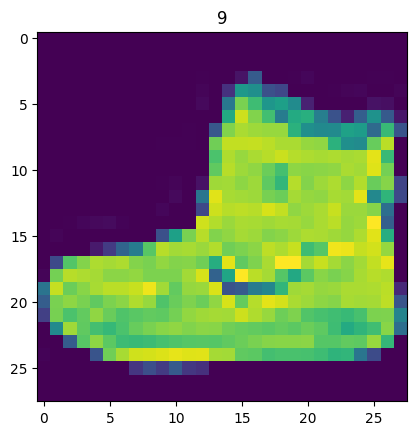

In [12]:
import matplotlib.pyplot as plt 
image, label = train_data[0]
print(f" Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

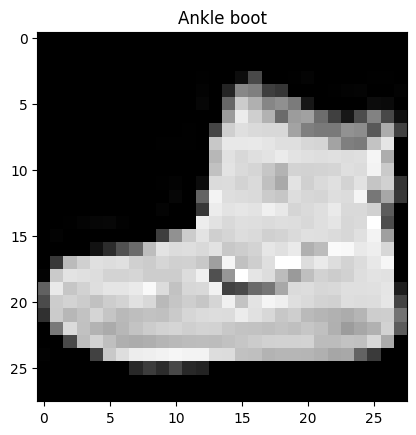

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

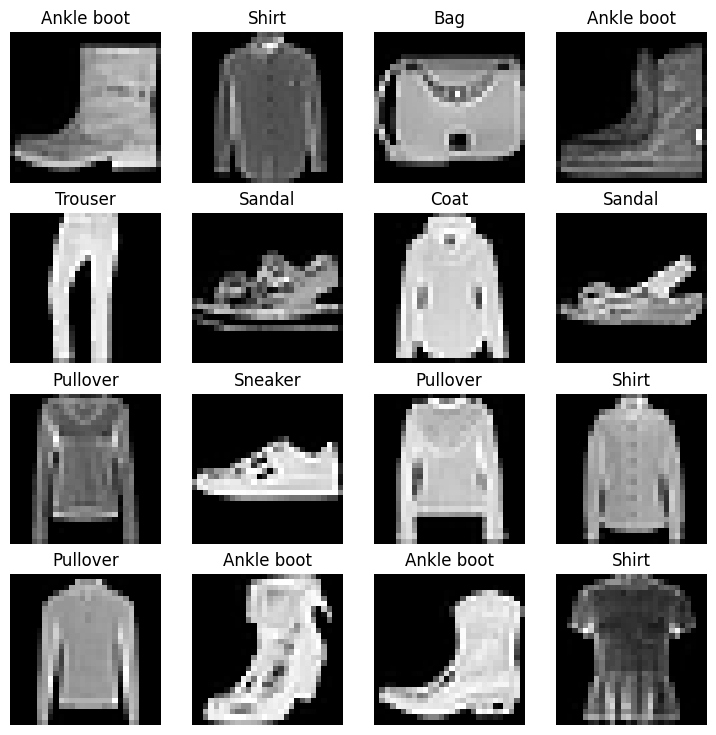

In [14]:
# plot more images 
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines ? or do you think we will need non-linarities?

## 2. Prepare dataLoader 

Right now our data is in the form of PyTorch datasets. 

dataLoader turns our dataset into Pytorch iterable.

more specifically, we want to turn our data into batches (or mini-batches)

1. it is more computationaly efficient , as in your computing hardware may not be able to look (stoer in mameoy) at 6000 in one hit. so we break it down to 32 imgase at a time 9batch size of 32). 

2. it gives our neural network more chances to update ites gradients per epochs.




In [15]:
from torch.utils.data import DataLoader


# Setup the batch size hyperjparameter 
Batch_size = 32

# turn datasets into iterable(batchs)
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = Batch_size,
                             shuffle=True)


test_dataloader = DataLoader(dataset=test_data,
                            batch_size=Batch_size,
                            shuffle=False)



train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x16203a12f70>,
 <torch.utils.data.dataloader.DataLoader at 0x16203669d30>)

In [16]:
# let's check out what what we have created 
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train-dataloader: {len(train_dataloader)} batches of {Batch_size}")
print(f"length of Test_dataloader: {len(test_dataloader)} batches of {Batch_size}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x0000016203A12F70>, <torch.utils.data.dataloader.DataLoader object at 0x0000016203669D30>)
Length of train-dataloader: 1875 batches of 32
length of Test_dataloader: 313 batches of 32


In [17]:
# check out what's inside the training dataloader 
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size  torch.Size([])


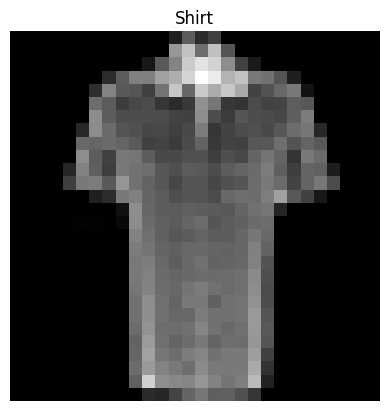

In [18]:
# show a smaple 
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size  {label.shape}")

## 3. Model 0: Build model 

when starting to build a series of machine learning modelling experiments, it's best preactice to start with a baseline model. 

A baseline model is a sample model you will try and improve upon with subseuent models/experiments. 


In [19]:
# create a flatten layer 

flatten_model = nn.Flatten()


# get a single sample 
x = train_features_batch[0]

# flatten the sample 
output = flatten_model(x)


print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

# device = "cuda" if torch.cuda.is_available() else "cpu"
# device

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
# dummy_x = torch.rand([1,1,28,28])
# model_0(dummy_x).shape

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics 

* Loss function - since we are working with multi-class data ,our loss 
function will be nn.CrossEntropy()
* optimizer - our optimizer is torch.optim.SGD() 
* Evaluation metrics - since we are working on a classification problem , let's ues accurcy as our evaluation metrics


In [24]:
import requests 
from pathlib import Path 

# download helper functin from Learn PyTorchh repo
if Path("helper_funtions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
    
else:
    print("Downloading helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
        
        
        

In [25]:
# import accuracy matrics 
from helper_functions import accuracy_fn

# setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


### 3.2 Creating a function to time our experiments 

Machine Learning is very experimental. 
Two of the manin things you will often want to track are:

1. Model's perform (loss and accuracy value etc)
2. How fast it runs 

In [26]:
from timeit import default_timer as timer 

def print_train_time(start: float,
                    end : float,
                    device: torch.device =None ):
    
    """
    Prints defference between start and end time.
    """
    
    total_time = end - start 
    print(f"Train time on {device}: {total_time: .3f} seconds")
    return total_time 

In [27]:
start_time = timer()

# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu:  0.000 seconds


3.1500000005735274e-05

### 3.3 creating a training loop and training a model on batches of data 


1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss 
3. Loop through testing batches , perform testing steps, calculate the test loss * per batch*.
4. Print ot what's happening. 
5. Time it all (for fun).


In [28]:
next(model_0.parameters()).device

device(type='cpu')

In [29]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_gpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_gpu, 
                                           end=train_time_end_on_gpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu:  182.051 seconds


## 4. Make predictions and get Model 0 result 

In [30]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             accuracy_fn):
    
    """
     Return a dictionary containig the results of model predicting on data_loader.
    """
    
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions 
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch 
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
            
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
        
    return {"model_name":model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
            "model_acc":acc
           
           }




# calculate model 0 results on test dataset 
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)


model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

# 5. Setup device agnostic-code (for using a GPU in there is one)

In [31]:
!nvidia-smi

Wed Jun 28 10:20:07 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.31                 Driver Version: 545.31       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   41C    P8               8W / 370W |      0MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
torch.cuda.is_available()

True

In [33]:
# setup device 
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6. Model 1: Building a better model with non-linearity 

In [34]:
# create a model with non-linear and lineary layer 
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int):
        
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU(),
            
            
        )
        
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [35]:
# create an instance of model_1 
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units = 10,
                              output_shape=len(class_names)
                             ).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.1 setup loss, optimizer and evaluatin metrics 


In [36]:
from helper_functions import accuracy_fn 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops 

Let's create a function for:
* training loop - train_step()
* testing loop - test_step()

In [37]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [38]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Epoch: 3
---------
Train loss: 0.64384 | Train accuracy: 76.52%
Test loss: 0.65079 | Test accuracy: 76.13%

Epoch: 4
---------
Train loss: 0.62892 | Train accuracy: 77.00%
Test loss: 0.65277 | Test accuracy: 75.95%

Epoch: 5
---------
Train loss: 0.61569 | Train accuracy: 77.43%
Test loss: 0.64517 | Test accuracy: 76.54%

Epoch: 6
---------
Train loss: 0.60672 | Train accuracy: 77.80%
Test loss: 0.62879 | Test accuracy: 76.67%

Epoch: 7
---------
Train loss: 0.47136 | Train accuracy: 83.09%
Test loss: 0.44768 | Test accuracy: 84.30%

Epoch: 8
---------
Train loss: 0.39947 | Train accuracy: 85.96%
Test loss: 0.44110 | Test accuracy: 84.75%

Epoch: 9
---------
Train los

In [39]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [40]:
# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4329095482826233,
 'model_acc': 84.82428115015975}

In [41]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

## Model 2: Building a CNN 


In [42]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        print(x.shape)
        x = self.block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x

In [43]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 steping through nn.Conv2d()

In [44]:
torch.manual_seed(42)

# create a batch of images 
images = torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"image batch shape {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test Image: \n {test_image}")

image batch shape torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test Image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [45]:
torch.manual_seed(42)

# create a single Conv2d layer 

conv_layer  = nn.Conv2d(in_channels = 3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# pass the data through the conv layer 
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [46]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through nn.MaxPool2d()



In [47]:
# print out original image shape without unsqueezed dimension 
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")


# create a sample nn.MaxPool2d layer 
max_pool_layer = nn.MaxPool2d(kernel_size=2)


# pass data through just the conv_layer 
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer(): {test_image_through_conv.shape}")


# pass data through the max pool layer 
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv_layer() and max_pool layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
shape after going through conv_layer() and max_pool layer: torch.Size([1, 10, 31, 31])


In [48]:
torch.manual_seed(42)

# create a random tensor with a similar number of dimensions to our image 
random_tensor = torch.randn(size=(1,1,2,2))
print(f"random tensor: \n{random_tensor}")
print(f"random tensor shape :\n {random_tensor.shape}")



# crate a maxpool layer 
max_pool_layer = nn.MaxPool2d(kernel_size =2)

# pass the random tensor through the maxpool layer 
max_pool_tensor = max_pool_layer(random_tensor)
print(f"max Pool tensor:\n {max_pool_tensor}")
print(f"max pool tensor shape : \n{max_pool_tensor.shape}")

random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape :
 torch.Size([1, 1, 2, 2])
max Pool tensor:
 tensor([[[[0.3367]]]])
max pool tensor shape : 
torch.Size([1, 1, 1, 1])


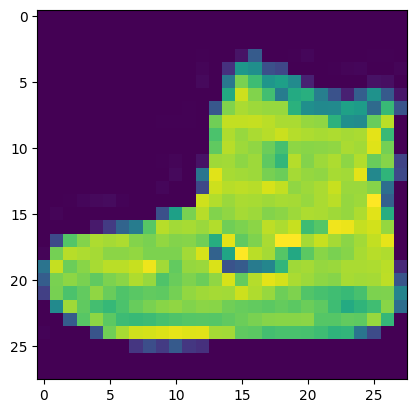

In [51]:
plt.imshow(image.squeeze())

In [52]:
model_2(image.to(device))

torch.Size([10, 14, 14])
torch.Size([10, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 490x10)

In [49]:
image.shape

torch.Size([1, 28, 28])

In [50]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [51]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [52]:
10*7*7

490

### 7.3 Setup a loss function and optimizer for model_2

In [53]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

### 4.4 Training and testing model_2 using our training and test function

In [54]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
t

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])

## model_2

In [55]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [56]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [57]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59035 | Train accuracy: 78.50%
Test loss: 0.39080 | Test accuracy: 85.98%

Epoch: 1
---------
Train loss: 0.36327 | Train accuracy: 86.93%
Test loss: 0.35397 | Test accuracy: 86.98%

Epoch: 2
---------
Train loss: 0.32589 | Train accuracy: 88.14%
Test loss: 0.32853 | Test accuracy: 88.12%

Train time on cuda:  43.940 seconds


In [58]:
# get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3285287320613861,
 'model_acc': 88.11900958466454}

In [59]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [60]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4329095482826233,
 'model_acc': 84.82428115015975}

## 8. Compare model results and training time 

In [61]:
import pandas as pd 
compare_results  = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.432910,84.824281
2,FashionMNISTModelV2,0.328529,88.119010


In [62]:
# Add training time to results comparison 
compare_results["training_time"]=[total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,182.051117
1,FashionMNISTModelV1,0.432910,84.824281,137.618096
2,FashionMNISTModelV2,0.328529,88.119010,43.940058


Text(0, 0.5, 'model')

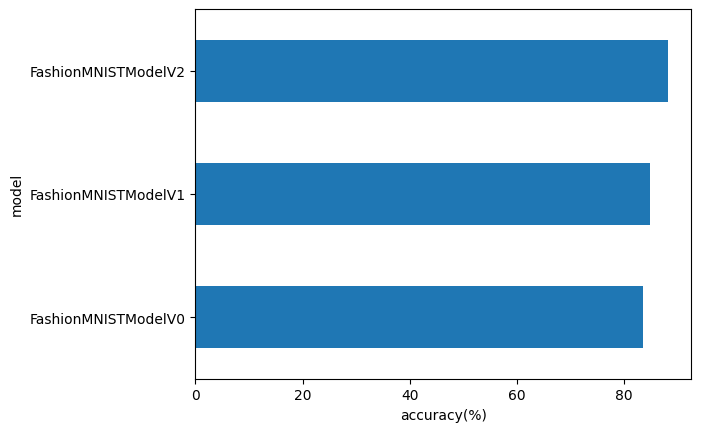

In [63]:
# visualize our model results 
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")  #barh = horizontal bar 
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## 9. Make and evaluate random prediction with best model 

In [64]:
def make_predictions(model:torch.nn.Module,
                    data:list,
                    device:torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            
            # prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # forward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # get prediction probability 
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # get pred_prob off the GPU for further calculations 
            pred_probs.append(pred_prob.cpu())
            
            
        # stack the pred_probs to turn list into a tensor 
        return torch.stack(pred_probs)
            
        
            
        

In [65]:
import random 
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
    # view the first sample shape 
    
test_samples[0].shape

torch.Size([1, 28, 28])

In [66]:
img, label = test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Sandal')

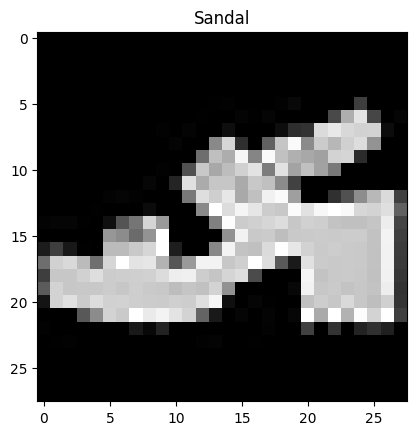

In [67]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [68]:
# make predictions 
pred_probs = make_predictions(model=model_2,
                             data=test_samples)


# view first two predictions probabilites 
pred_probs[:2]

tensor([[9.0527e-08, 1.1008e-07, 3.8326e-08, 1.0295e-08, 7.9519e-09, 9.9898e-01,
         2.2206e-07, 6.3851e-06, 3.1302e-05, 9.8166e-04],
        [9.4084e-02, 3.9916e-01, 4.1721e-03, 3.8420e-01, 8.8479e-02, 9.7987e-05,
         2.6623e-02, 4.5625e-04, 2.5217e-03, 2.0398e-04]])

In [69]:
# convert prediction probabilites to labels 
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

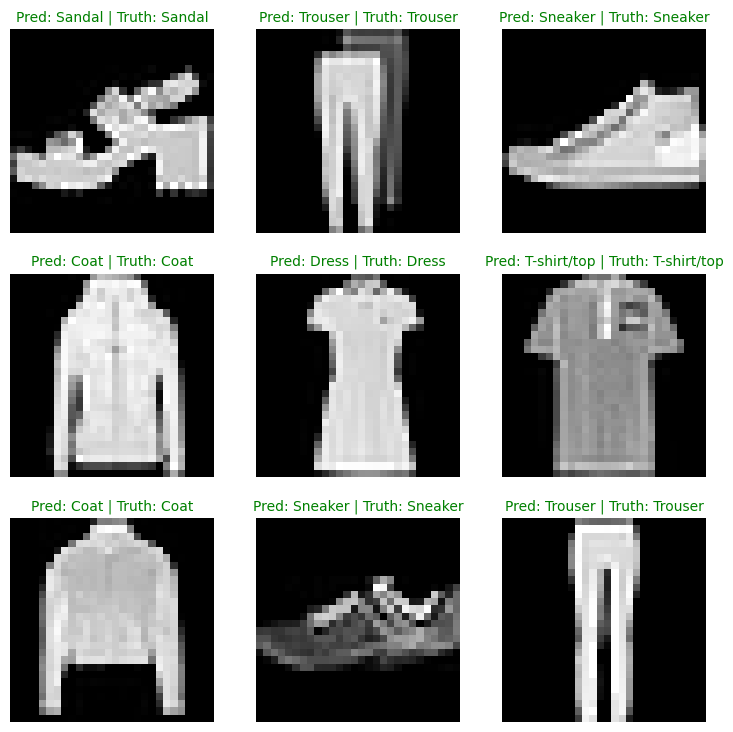

In [70]:
# plot predictions 
plt.figure(figsize=(9,9))
nrows = 3
ncols =3
for i, sample in enumerate(test_samples):
    # create subplot 
    plt.subplot(nrows,ncols, i+1)
    
    # plot the target image 
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # find the prediction (in text form e.g "sandal")
    pred_label = class_names[pred_classes[i]]

    # get the truth label (in text form )
    truth_label = class_names[test_labels[i]]
    
    # create  a title for the plot 
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    # check for equality between pred and truth and change color of title text 
    if pred_label == truth_label:
        plt.title(title_text , fontsize=10,c="g") 
        
    else:
        plt.title(title_text, fontsize=10,c="r")
        
        
    plt.axis(False)
        

## 10. Making a confusion matrix for further prediction evaluation 


1. make prediction with our trainined model on the test dataset 
2. Make a confusion matrix torchmetrics.confusionMatrix
3. plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix()

In [73]:
import mlxtend

In [74]:
mlxtend.__version__

'0.22.0'

In [77]:
# import tqdm.auto
from tqdm.auto import tqdm 

# 1. Make prediction with trained model 
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making prediction...."):
        
        # send the data and targets to target device 
        X,y = X.to(device), y.to(device)
        
        # do the forward pass 
        y_logit = model_2(X)
        
        # Turn predictions from logits -> predictions probabilites -> prediction label 
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        
        # put prediction on CPU for evaluation 
        y_preds.append(y_pred.cpu())
        
    # concatenate list of prediction into a tensor 
    print(y_preds)
    y_pred_tensor = torch.cat(y_preds)
    y_pred_tensor
    

Making prediction....:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 3, 4, 6, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 4, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 4, 8, 8, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 8, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 6, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        2, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 2, 3, 8, 9, 6, 1, 2, 0, 2, 3, 0, 8, 3, 7, 4,
       

In [78]:
len(y_pred_tensor)

10000

In [85]:
try:
    import torchmetrics, mlxtend 
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1] >= 19)
except:
    !pip install -q torchmetrics -U mlxtend 
    import torchmetrics, mlxtend 
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0
mlxtend version: 0.22.0


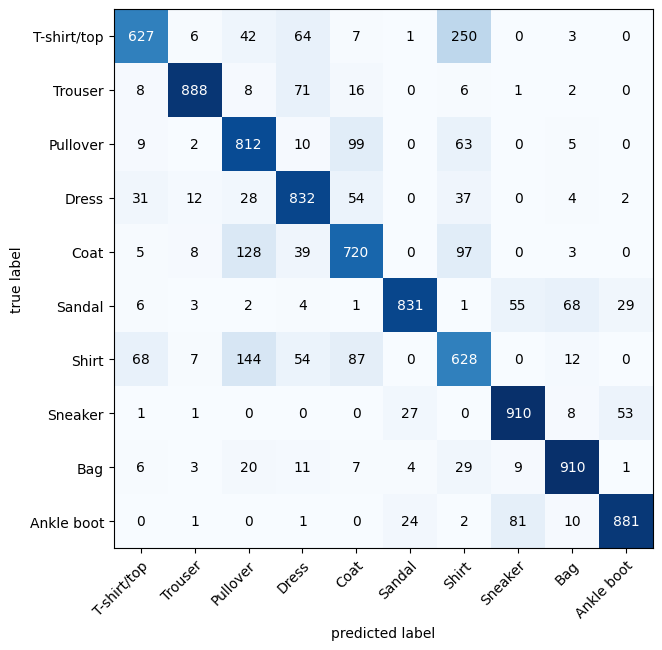

In [91]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [86]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [87]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [90]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

## 11. Save and load best performing model 

In [92]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [5]:
import torch


# create a new instatance 
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names)
                               )

# Load in the save stati_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to the target device 
loaded_model_2.to(device)

NameError: name 'FashionMNISTModelV2' is not defined

In [95]:
# evaluate loaded model 
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn

)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3285287320613861,
 'model_acc': 88.11900958466454}

In [96]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3285287320613861,
 'model_acc': 88.11900958466454}

In [99]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)